In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option("display.max_columns", 100) # Show all columns when looking at dataframe

In [2]:
df = pd.read_csv(r"H:\New folder\Files\home\jovyan\work\week2\nhanes_2015_2016.csv")

In [3]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [4]:
# Get columns names
col_names = df.columns
col_names

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [5]:
# Another way to get only column names that include 'BMX' is with list comprehension

keep = [column for column in df.columns if 'BMX' in column]
keep

['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']

In [6]:
df_BMX = df[keep]

In [7]:
df_BMX.head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4


# Method 1

In [8]:
df.loc[:, keep].head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4


# Method 2

In [9]:
index_bool = np.isin(df.columns, keep)
index_bool

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False])

In [10]:
df.iloc[:, index_bool].head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4


# Selection by conditions

In [11]:
# Lets only look at rows who 'BMXWAIST' is larger than the median
waist_median = pd.Series.median(df_BMX['BMXWAIST']) # get the median of 'BMXWAIST'
waist_median

98.3

In [12]:
df_BMX[df_BMX['BMXWAIST'] < waist_median].head()

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4
5,64.4,150.0,28.6,34.4,33.5,31.4,92.9
6,76.6,165.4,28.0,38.8,38.0,34.0,86.6
7,64.5,151.3,28.2,34.1,33.1,31.5,93.3
11,76.2,177.8,24.1,43.9,37.8,33.0,90.1


In [13]:
# Lets add another condition, that 'BMXLEG' must be less than 32
condition1 = df_BMX['BMXWAIST'] > waist_median
condition2 = df_BMX['BMXLEG'] < 32
df_BMX[condition1 & condition2].head() # Using [] method
# Note: can't use 'and' instead of '&'

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
15,80.5,150.8,35.4,31.6,32.7,33.7,113.5
27,75.6,145.2,35.9,31.0,33.1,36.0,108.0
39,63.7,147.9,29.1,26.0,34.0,31.5,110.0
52,105.9,157.7,42.6,29.2,35.0,40.7,129.1
55,77.5,148.3,35.2,30.5,34.0,34.4,107.6


In [14]:
df_BMX.loc[condition1 & condition2, :].head() # Using df.loc[] method
# note that the conditiona are describing the rows to keep

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
15,80.5,150.8,35.4,31.6,32.7,33.7,113.5
27,75.6,145.2,35.9,31.0,33.1,36.0,108.0
39,63.7,147.9,29.1,26.0,34.0,31.5,110.0
52,105.9,157.7,42.6,29.2,35.0,40.7,129.1
55,77.5,148.3,35.2,30.5,34.0,34.4,107.6


In [15]:
# Lets make a small dataframe and give it a new index so can more clearly see the differences between .loc and .iloc
tmp = df_BMX.loc[condition1 & condition2, :].head()
tmp.index = ['a', 'b', 'c', 'd', 'e'] # If you use different years than 2015-2016, this my give an error. Why?
tmp

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
a,80.5,150.8,35.4,31.6,32.7,33.7,113.5
b,75.6,145.2,35.9,31.0,33.1,36.0,108.0
c,63.7,147.9,29.1,26.0,34.0,31.5,110.0
d,105.9,157.7,42.6,29.2,35.0,40.7,129.1
e,77.5,148.3,35.2,30.5,34.0,34.4,107.6


In [16]:
tmp.loc[['a', 'b'],'BMXLEG']

a    31.6
b    31.0
Name: BMXLEG, dtype: float64

In [17]:
tmp.iloc[[0, 1],3]

a    31.6
b    31.0
Name: BMXLEG, dtype: float64

# Multivariate Distributions in Python

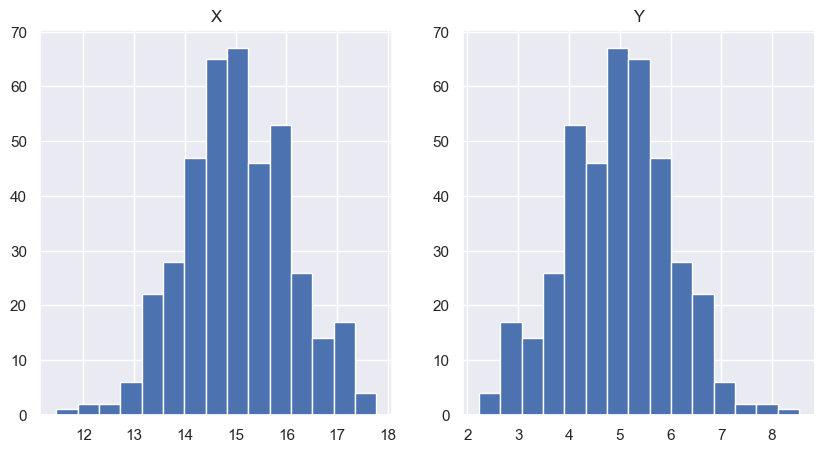

In [18]:
# import the packages we are going to be using
import numpy as np # for getting our distribution
import matplotlib.pyplot as plt # for plotting
import seaborn as sns; sns.set() # For a different plotting theme

# Don't worry so much about what rho is doing here
# Just know if we have a rho of 1 then we will get a perfectly
# upward sloping line, and if we have a rho of -1, we will get 
# a perfectly downward slopping line. A rho of 0 will 
# get us a 'cloud' of points
r = -1

# Don't worry so much about the following three lines of code for now
# this is just getting the data for us to plot
mean = [15, 5]
cov = [[1, r], [r, 1]]
x, y = x, y = np.random.multivariate_normal(mean, cov, 400).T

# Adjust the figure size
plt.figure(figsize=(10,5))

# Plot the histograms of X and Y next to each other
plt.subplot(1,2,1)
plt.hist(x = x, bins = 15)
plt.title("X")

plt.subplot(1,2,2)
plt.hist(x = y, bins = 15)
plt.title("Y")

plt.show()

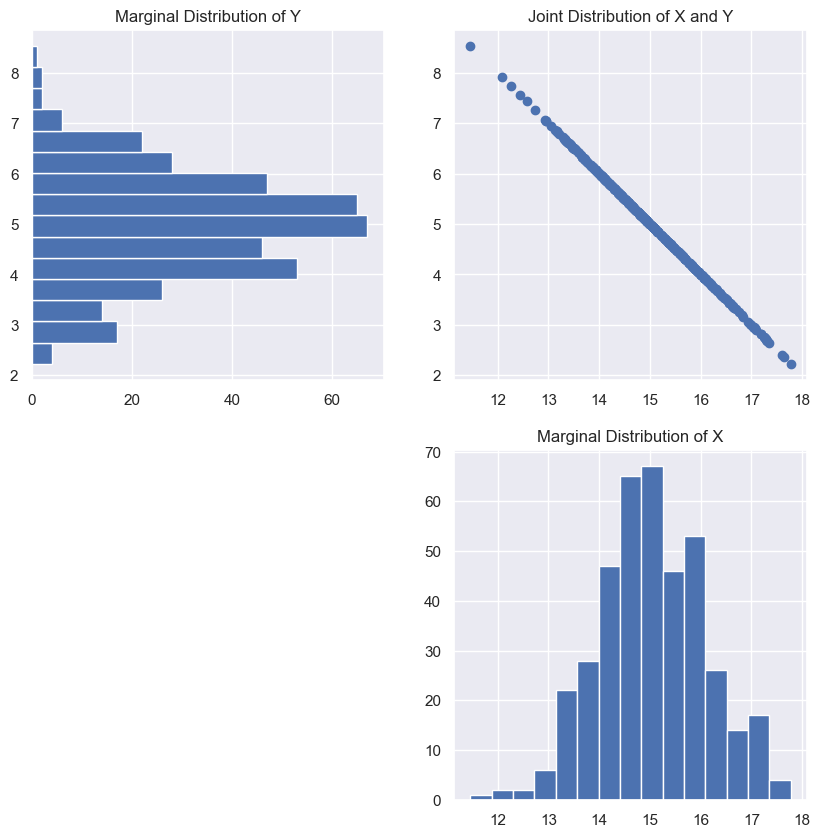

In [19]:
# Plot the data
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
plt.scatter(x = x, y = y)
plt.title("Joint Distribution of X and Y")

# Plot the Marginal X Distribution
plt.subplot(2,2,4)
plt.hist(x = x, bins = 15)
plt.title("Marginal Distribution of X")


# Plot the Marginal Y Distribution
plt.subplot(2,2,1)
plt.hist(x = y, orientation = "horizontal", bins = 15)
plt.title("Marginal Distribution of Y")

# Show the plots
plt.show()

# Unit Testing

In [20]:
import numpy as np
import pandas as pd
import matplotlib as plt
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe

In [21]:
# df.index = range(1, df.shape[0] + 1)
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [22]:
# We want to find the mean of first 100 rows of 'BPXSY1' when 'RIDAGEYR' > 60

#pd.Series.mean(df[df.RIDAGEYR > 60].loc[range(0,100), 'BPXSY1'])

pd.Series.mean(df[df.RIDAGEYR > 60].iloc[range(0,100), 6])

70.61

In [23]:
# test our code on only ten rows so we can easily check
test = pd.DataFrame({'col1': np.repeat([3,1],5), 'col2': range(3,13)}, index=range(1,11))
test

,col1,col2
1,3,3
2,3,4
3,3,5
4,3,6
5,3,7
6,1,8
7,1,9
8,1,10
9,1,11
10,1,12


In [24]:
# pd.Series.mean(df[df.RIDAGEYR > 60].loc[range(0,5), 'BPXSY1'])
# should return 5

pd.Series.mean(test[test.col1 > 2].loc[range(1,5), 'col2'])

4.5

In [25]:
test[test.col1 > 2].loc[range(1,5), 'col2']
# 0 is not in the row index labels because the second row's value is < 2. For now, pandas defaults to filling this
# with NaN

1    3
2    4
3    5
4    6
Name: col2, dtype: int64

# Analysis of multivariate data - NHANES case study

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats


In [27]:
da = pd.read_csv(r"H:\New folder\Files\home\jovyan\work\week2\nhanes_2015_2016.csv")

In [28]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [29]:
da.BMXLEG.head()


0    43.3
1    38.0
2    35.6
3    38.5
4    37.4
Name: BMXLEG, dtype: float64

In [30]:
da.BMXARMC.head()


0    35.9
1    33.2
2    31.0
3    38.3
4    27.2
Name: BMXARMC, dtype: float64

<Axes: xlabel='BMXLEG', ylabel='BMXARML'>

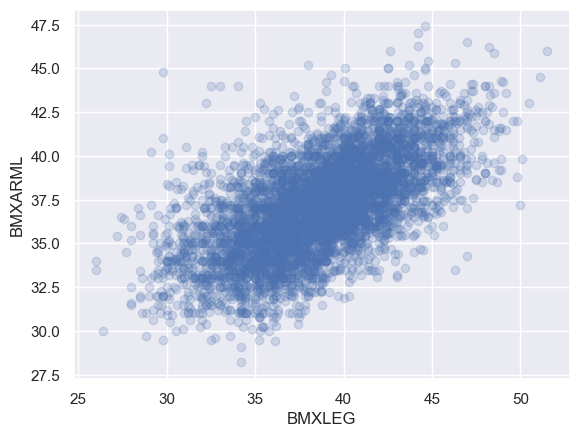

In [31]:
sns.regplot(x="BMXLEG", y="BMXARML", data=da, fit_reg=False, scatter_kws={"alpha": 0.2})

AttributeError: 'JointGrid' object has no attribute 'annotate'

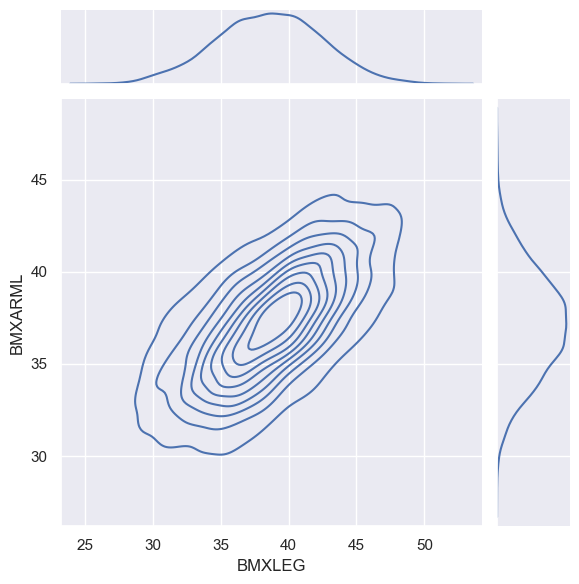

In [32]:
#ignore deprecation warning message
sns.jointplot(x="BMXLEG", y="BMXARML", kind='kde', data=da).annotate(stats.pearsonr)

AttributeError: 'JointGrid' object has no attribute 'annotate'

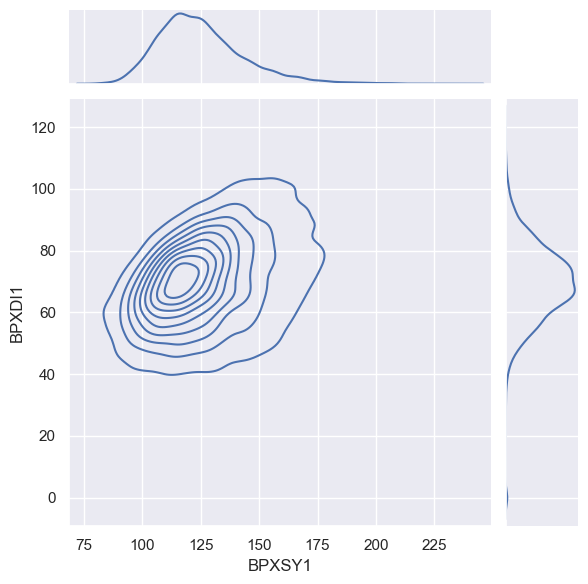

In [33]:
#ignore deprecation warning message
sns.jointplot(x="BPXSY1", y="BPXDI1", kind='kde', data=da).annotate(stats.pearsonr)

AttributeError: 'JointGrid' object has no attribute 'annotate'

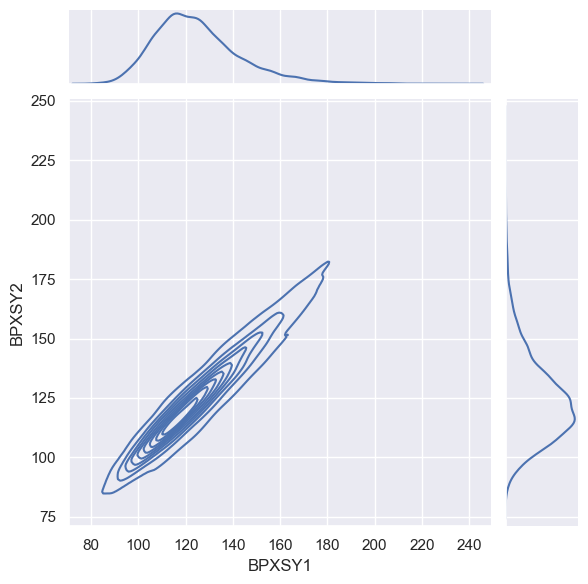

In [34]:
#ignore deprecation warning message
jp = sns.jointplot(x="BPXSY1", y="BPXSY2", kind='kde', data=da).annotate(stats.pearsonr)

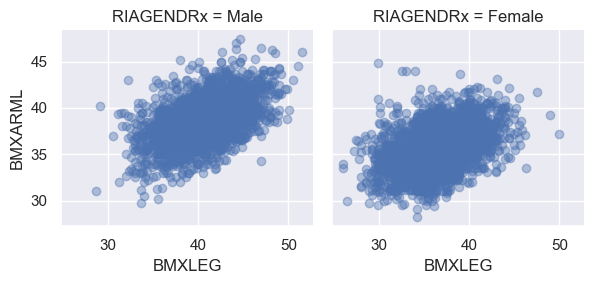

In [35]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 
sns.FacetGrid(da, col="RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.4).add_legend()

In [36]:
print(da.loc[da.RIAGENDRx=="Female", ["BMXLEG", "BMXARML"]].dropna().corr())
print(da.loc[da.RIAGENDRx=="Male", ["BMXLEG", "BMXARML"]].dropna().corr())

           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


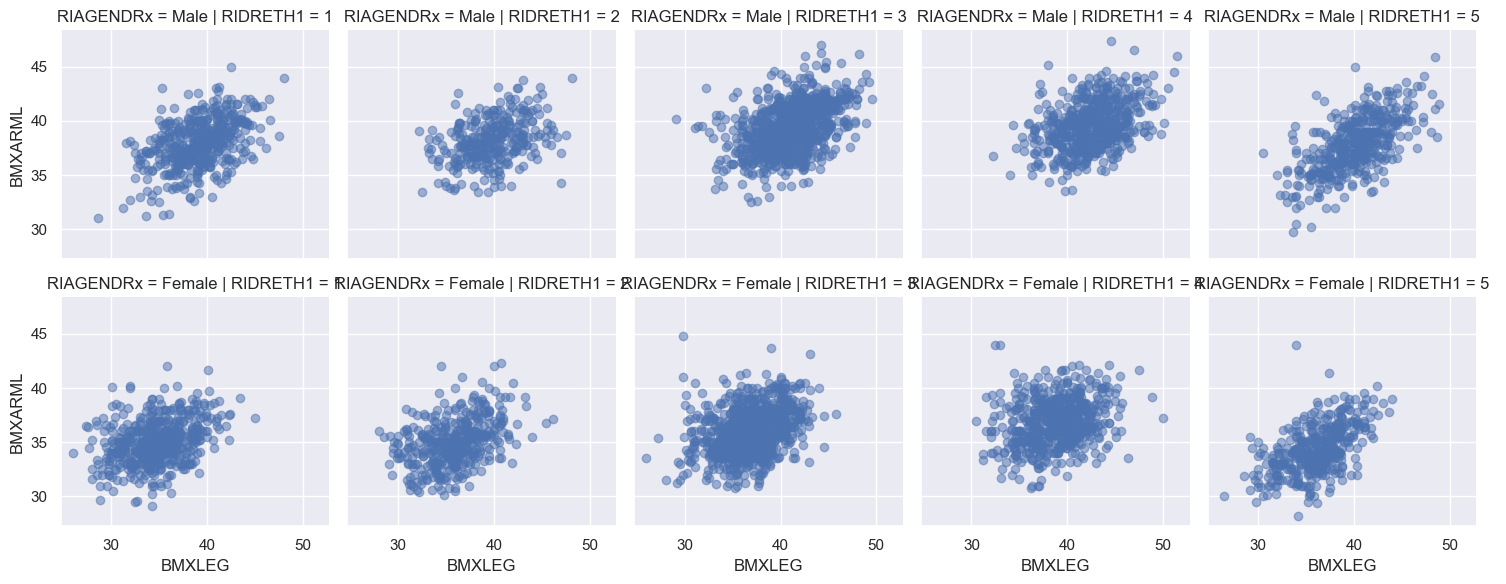

In [37]:
_ = sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML", alpha=0.5).add_legend()

In [38]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})
db = da.loc[(da.DMDEDUC2x != "Don't know") & (da.DMDMARTLx != "Refused"), :]

In [39]:
x = pd.crosstab(db.DMDEDUC2x, da.DMDMARTLx)
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


In [40]:
dx = db.loc[(db.RIDAGEYR >= 40) & (db.RIDAGEYR < 50)]
a = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

dx = db.loc[(db.RIDAGEYR >= 50) & (db.RIDAGEYR < 60)]
b = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

print(a.loc[:, ["Married"]].unstack())
print("")
print(b.loc[:, ["Married"]].unstack())

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.581818  0.464286  0.713376  0.476744        0.509554
Male       0.574074  0.714286  0.879310  0.616279        0.625000

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.490566  0.511111  0.648649  0.563107        0.496403
Male       0.666667  0.622642  0.737374  0.637255        0.555556


# Mixed categorical and quantitative data

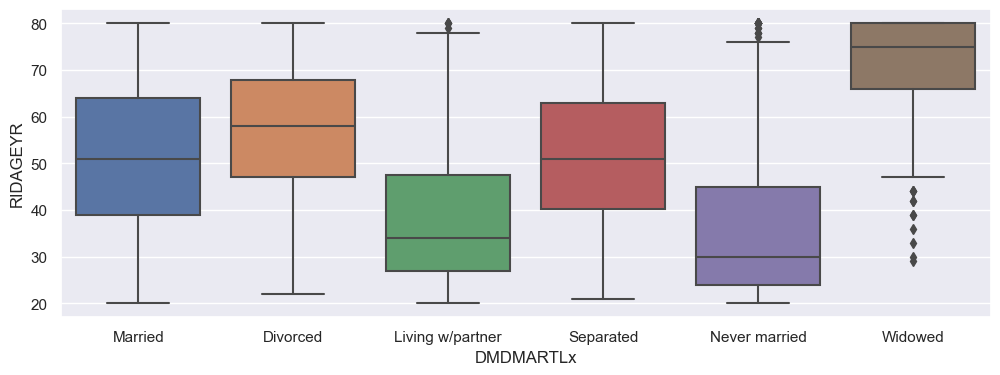

In [41]:
plt.figure(figsize=(12, 4))
sns.boxplot(x="DMDMARTLx", y="RIDAGEYR", data=db)
plt.show()

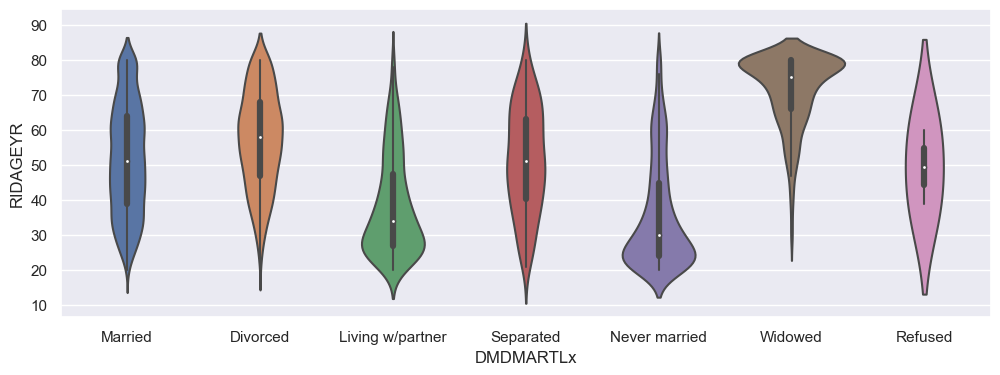

In [42]:
plt.figure(figsize=(12, 4))
a = sns.violinplot(x="DMDMARTLx", y="RIDAGEYR",data=da)
plt.show()